Toimme pandan, numpyn sekä .csv -tiedoston projektimme:

In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Muuttujaan "spotify" määritetään koko datatiedosto (.csv):
spotify = pd.read_csv('spotify_songs.csv')

Poistimme seuraavat sarakkeet, jotka eivät olleet tarpeellisia tässä analyysissä:

In [30]:
# .drop() -komento poistaa taulukosta halutut sarakkeet:
spotify = spotify.drop(['track_id',
                        'track_album_id',
                        'playlist_name',
                        'playlist_id',
                        'duration_ms',
                        'loudness',
                        'mode',
                        'energy',
                        'danceability',
                        'key',
                        'speechiness',
                        'acousticness',
                        'instrumentalness',
                        'liveness',
                        'valence','playlist_subgenre'],
                        # Axis -parametri:
                        axis = 1)

                        # "axis" parametrillä eritellään vaaka- & pystyrivit toisistaan:
                        #   - axis = 0 valitsee vaakarivin (yksittäinen rivi)
                        #   - axis = 1 valitsee pystyrivin (kokonainen sarake)

Muutimme kolumnien nimiä:

In [31]:
# .rename() -komento valitsee kolumneista halutut nimet, jotka voi vaihtaa:
spotify = spotify.rename(columns = {'track_name' : 'Track Name',
                                    'track_artist' : 'Artist',
                                    'track_popularity' : 'Popularity',
                                    'track_album_name' : 'Album Name',
                                    'track_album_release_date' : 'Release Date',
                                    'playlist_genre' : 'Genre',
                                    'tempo' : 'Tempo (BPM)'
                                    })

Muutimme Tempo -murtoluvun kokonaisluvuksi:

In [32]:
spotify['Tempo (BPM)'] = spotify['Tempo (BPM)'].astype(int)

Lopuksi tulostimme DataFrame taulukon:

In [33]:
# .head() -komento tulostaa oletuksena taulukon ensimmäiset 5 riviä | lisäämällä parametrit, tulostimme halutun rivimäärän (tässä tapauksessa ensimmäiset 2000 riviä):
spotify.head(2000)

,Track Name,Artist,Popularity,Album Name,Release Date,Genre,Tempo (BPM)
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,pop,122
1,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),2019-12-13,pop,99
2,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),2019-07-05,pop,124
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Call You Mine - The Remixes,2019-07-19,pop,121
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Someone You Loved (Future Humans Remix),2019-03-05,pop,123
...,...,...,...,...,...,...,...
1995,Bachelorette,Ashe,42,Bachelorette,2019-04-03,pop,87
1996,Playground,More Giraffes,46,Playground,2019-06-12,pop,80
1997,Flares,The Script,59,No Sound Without Silence,2014-09-12,pop,164
1998,Hungover You,Hazey Eyes,45,Hungover You,2019-01-30,pop,111


In [34]:
spotify.sort_values("Popularity", ascending=False)

,Track Name,Artist,Popularity,Album Name,Release Date,Genre,Tempo (BPM)
20091,Dance Monkey,Tones and I,100,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,latin,98
1551,Dance Monkey,Tones and I,100,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,pop,98
30202,ROXANNE,Arizona Zervas,99,ROXANNE,2019-10-10,edm,116
23104,ROXANNE,Arizona Zervas,99,ROXANNE,2019-10-10,r&b,116
21468,ROXANNE,Arizona Zervas,99,ROXANNE,2019-10-10,r&b,116
...,...,...,...,...,...,...,...
15604,(I Can't Get No) Satisfaction - Mono Version /...,The Rolling Stones,0,Hot Rocks 1964-1971,1971-12-20,rock,135
4977,Stone,JOY.,0,Stone,2014-10-28,pop,124
4975,Walk Away,LANY,0,Hot Lights,2014-04-22,pop,85
11326,The Back Seat Of My Car,Paul McCartney,0,Wingspan (UK Version),2001-05-07,rock,163


In [35]:
def categorize_popularity(Popularity):
    if Popularity >= 0 and Popularity < 25:
        return 'low'
    elif Popularity >=25 and Popularity<50:
        return 'medium'
    elif Popularity >=50 and Popularity<75:
        return 'high'
    elif Popularity >= 75:
        return 'extremely-high'
    
spotify['Popularity'] = spotify['Popularity'].apply(categorize_popularity)
    

In [36]:
spotify.head(2000)

,Track Name,Artist,Popularity,Album Name,Release Date,Genre,Tempo (BPM)
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,high,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,pop,122
1,Memories - Dillon Francis Remix,Maroon 5,high,Memories (Dillon Francis Remix),2019-12-13,pop,99
2,All the Time - Don Diablo Remix,Zara Larsson,high,All the Time (Don Diablo Remix),2019-07-05,pop,124
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,high,Call You Mine - The Remixes,2019-07-19,pop,121
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,high,Someone You Loved (Future Humans Remix),2019-03-05,pop,123
...,...,...,...,...,...,...,...
1995,Bachelorette,Ashe,medium,Bachelorette,2019-04-03,pop,87
1996,Playground,More Giraffes,medium,Playground,2019-06-12,pop,80
1997,Flares,The Script,high,No Sound Without Silence,2014-09-12,pop,164
1998,Hungover You,Hazey Eyes,medium,Hungover You,2019-01-30,pop,111


In [37]:
spotify.dropna(subset=['Track Name', 'Artist','Album Name'], inplace=True)
missing_count = spotify.isnull().sum()
print(missing_count)


Track Name      0
Artist          0
Popularity      0
Album Name      0
Release Date    0
Genre           0
Tempo (BPM)     0
dtype: int64


In [38]:
spotify.head(1500)

,Track Name,Artist,Popularity,Album Name,Release Date,Genre,Tempo (BPM)
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,high,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,pop,122
1,Memories - Dillon Francis Remix,Maroon 5,high,Memories (Dillon Francis Remix),2019-12-13,pop,99
2,All the Time - Don Diablo Remix,Zara Larsson,high,All the Time (Don Diablo Remix),2019-07-05,pop,124
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,high,Call You Mine - The Remixes,2019-07-19,pop,121
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,high,Someone You Loved (Future Humans Remix),2019-03-05,pop,123
...,...,...,...,...,...,...,...
1495,Slow Dance,AJ Mitchell,extremely-high,Slow Dance,2019-08-09,pop,127
1496,Like I Did,Shane Harper,medium,Like I Did,2016-05-27,pop,97
1497,"Determinate - From ""Lemonade Mouth""",Adam Hicks,high,Lemonade Mouth,2011-01-01,pop,139
1498,"Take On the World - Theme Song From ""Girl Meet...",Rowan Blanchard,high,"Take On the World (Theme Song From ""Girl Meets...",2014-01-01,pop,115


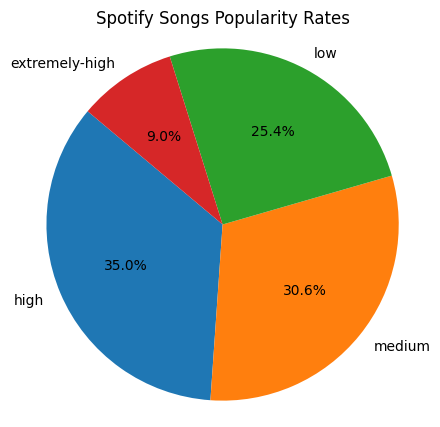

In [39]:
categories = spotify['Popularity']

category_counts = categories.value_counts()

plt.figure(figsize=(5, 5))  # Set the size of the pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Spotify Songs Popularity Rates')

plt.show()

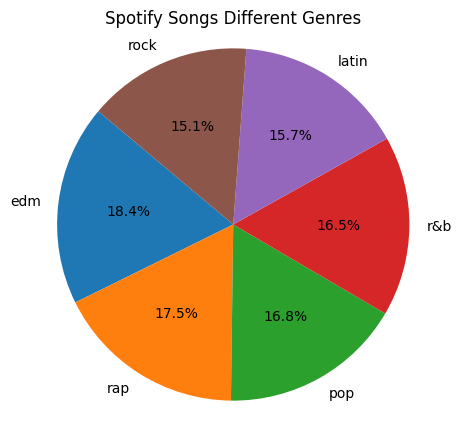

In [40]:
categories = spotify['Genre']

category_counts = categories.value_counts()

plt.figure(figsize=(5, 5))  # Set the size of the pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Spotify Songs Different Genres')

plt.show()

In [41]:
# # Assuming 'date' and 'quantity' columns exist in your Spotify DataFrame
# spotify['Release Date'] = pd.to_datetime(spotify['Release Date'])  # Convert 'date' column to datetime

# # Assuming 'Release Date' column exists in your 'top_songs' DataFrame
# spotify['Release Date'] = pd.to_datetime(spotify['Release Date'])  # Convert 'Release Date' column to datetime

# spotify.set_index('Release Date', inplace=True)

# # Assuming 'quantity' column exists in your 'spotify' DataFrame
# yearly_data = spotify['quantity'].resample('Y').sum()

# plt.plot(yearly_data.index, yearly_data.values, marker='o', linestyle='-')

# plt.xlabel('Year')
# plt.ylabel('Number of Popular Songs')
# plt.title('Number of Popular Songs Released Each Year')

# plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
# plt.tight_layout()

# plt.show()

In [42]:
# spotify.set_index('date', inplace=True)

# pd.to_datetime(top_songs['Release Date'])

# yearly_data = spotify.resample('Y')['quantity'].sum()

# plt.plot(yearly_data.index, yearly_data.values, marker='o', linestyle='-')

# plt.xlabel('Release Date')
# plt.ylabel('Number of Popular Songs')
# plt.title('Release Dates of Most Popular Songs')

# plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
# plt.tight_layout()

# plt.show()